In [1]:
!date

Sat Jun 15 00:08:18 PDT 2019


# Getting Started Analysis: Analyzing SRR8599150 with ScanPy

### Import Packages

In [3]:
import scanpy as sc
from scipy import sparse, io
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import numpy as np

matplotlib.rcParams.update({'font.size': 22})
%config InlineBackend.figure_format = 'retina'

### Import MTX, GENES, BARCODES

In [4]:
folder = "/home/alisina/getting_started/kallisto_SRR8599150_v2/"

The annotated dataframe has rows (obs) which are cell barcodes, columns (var) which are genes. The actual matrix `adata.X` is a sparse matrix.

In [5]:
adata = sc.read_mtx(folder + "genes.mtx")
adata.obs.index = pd.read_csv(folder + "genes.barcodes.txt", header=None)[0].values
adata.var.index = pd.read_csv(folder + "genes.genes.txt", header=None)[0].values

In [6]:
adata

AnnData object with n_obs × n_vars = 96447 × 31053 

## Make the knee plot

In [7]:
knee = np.sort((np.array(adata.X.sum(axis=1))).flatten())[::-1]

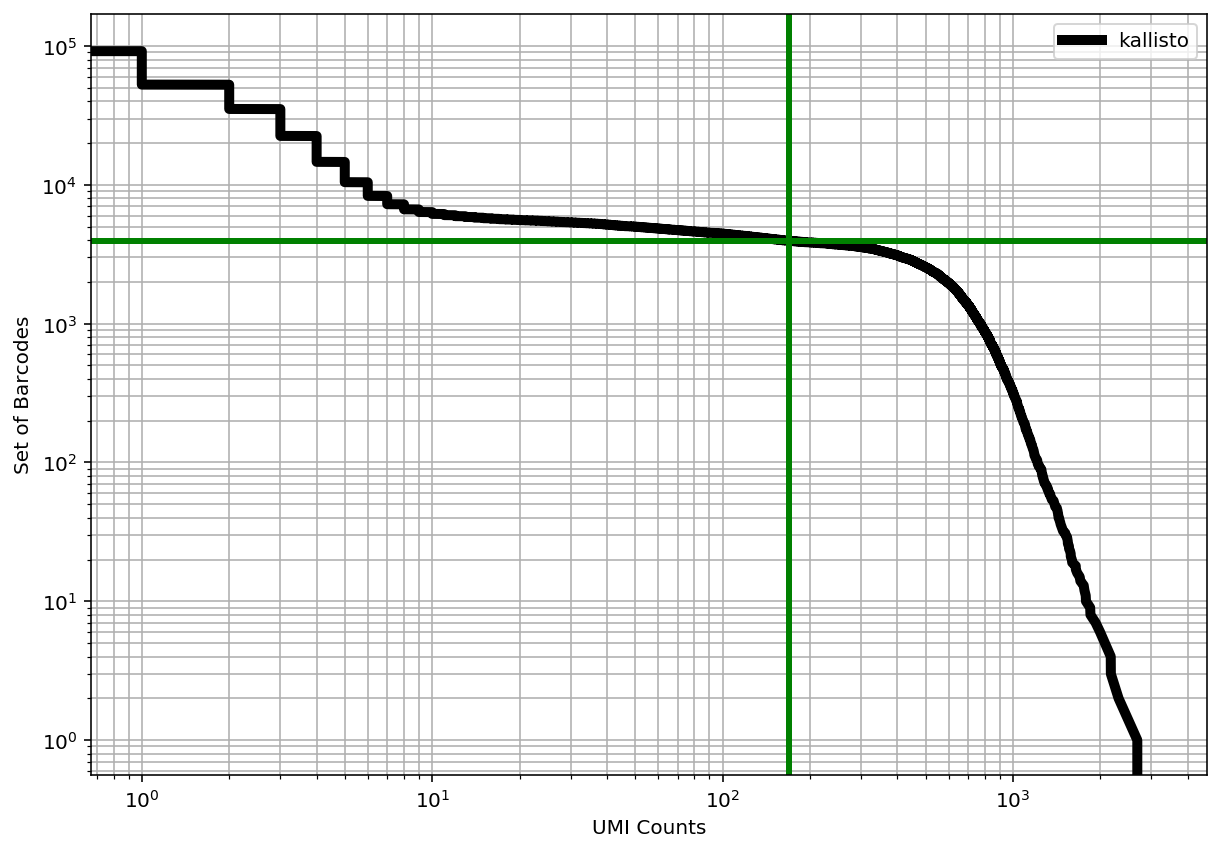

In [8]:
fig, ax = plt.subplots(figsize=(10, 7))

expected_num_cells=3949

ax.loglog(knee, range(len(knee)), label="kallisto", linewidth=5, color="k")
ax.axvline(x=knee[expected_num_cells], linewidth=3, color="g")
ax.axhline(y=expected_num_cells, linewidth=3, color="g")

ax.set_xlabel("UMI Counts")
ax.set_ylabel("Set of Barcodes")

plt.grid(True, which="both")
ax.legend()
plt.show()

# Analysis with ScanPy

In [9]:
sc.pp.filter_cells(adata, min_genes=0)
sc.pp.filter_cells(adata, min_counts=knee[expected_num_cells])
sc.pp.filter_genes(adata, min_cells=0)

In [10]:
adata

AnnData object with n_obs × n_vars = 3950 × 31053 
    obs: 'n_genes', 'n_counts'
    var: 'n_cells'

### Distribution of genes

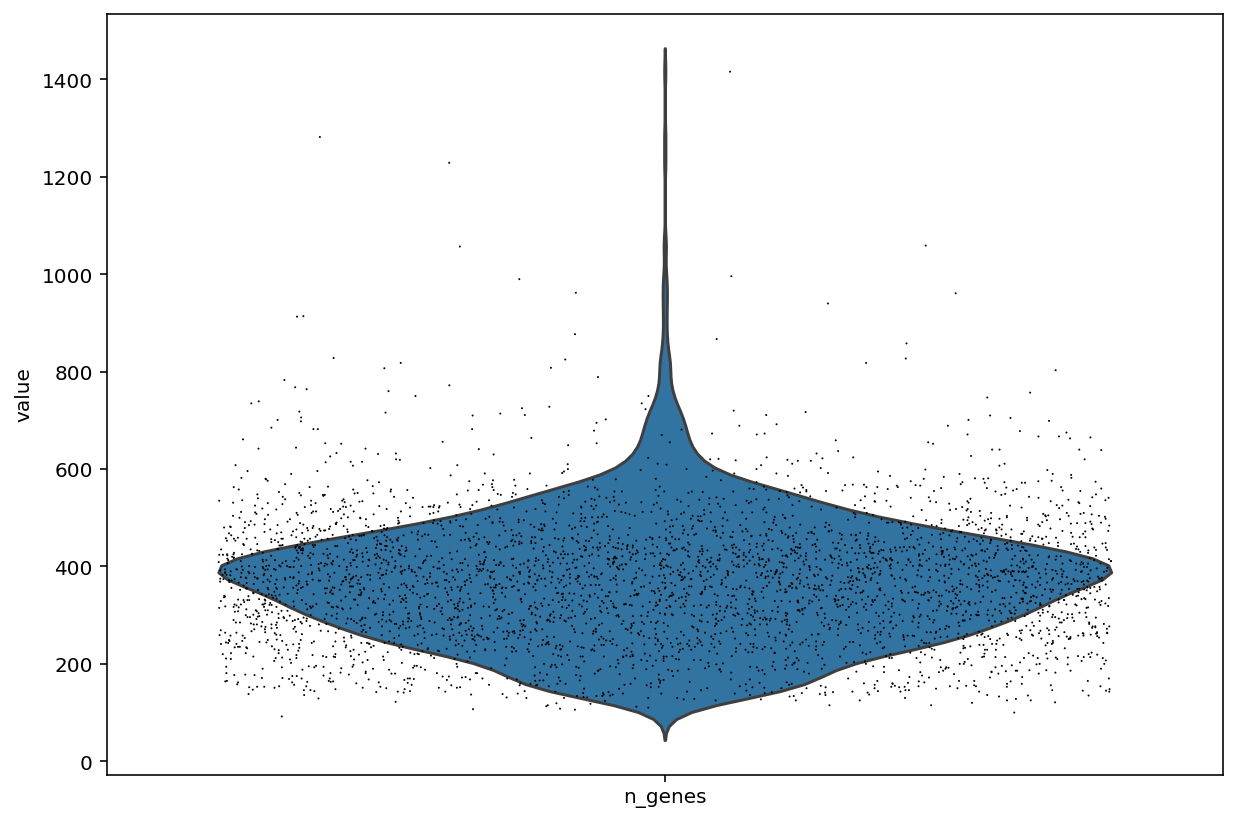

In [11]:
fig, ax = plt.subplots(figsize=(10, 7))
sc.pl.violin(adata, 'n_genes', jitter=0.4, ax=ax)

### Distribution of counts

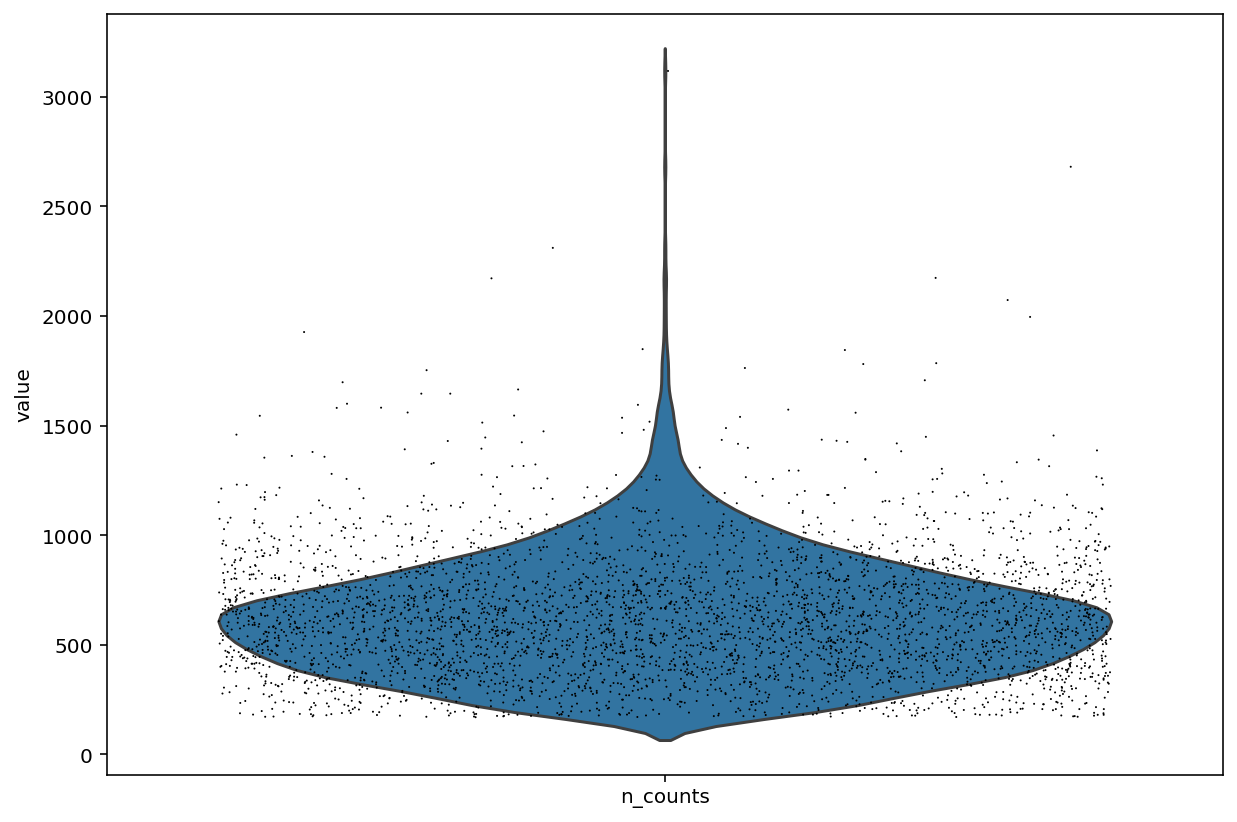

In [12]:
fig, ax = plt.subplots(figsize=(10, 7))
sc.pl.violin(adata, 'n_counts', jitter=0.4, ax=ax)

Normalize the counts in the matrix

In [13]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

apply $log(1+count)$ to all counts in your matrix

In [14]:
adata.raw = sc.pp.log1p(adata, copy=True)

In [15]:
sc.pp.log1p(adata)

Filter adata for highly variable genes, and make `fadata` which only contains highly variable genes for further analysis.

### Highly variable genes

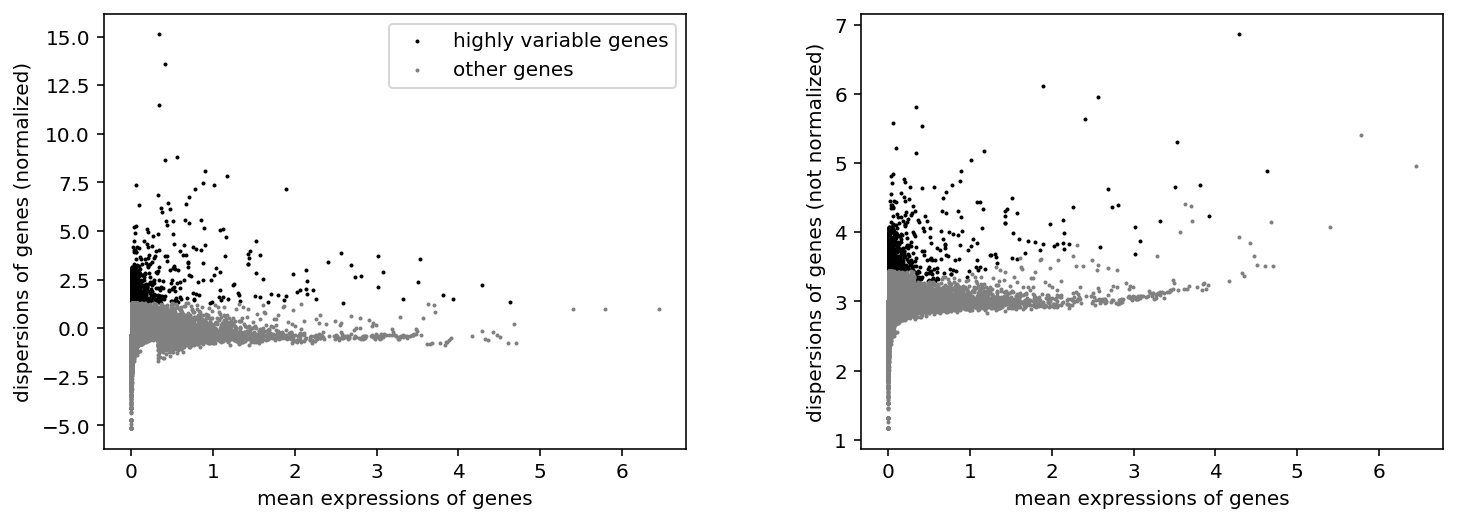

In [46]:
filter_result = sc.pp.highly_variable_genes(adata, min_disp=0.3,inplace=False, n_top_genes=1209)

sc.pl.highly_variable_genes(filter_result)

In [47]:
print("{:,} highly variable genes".format(sum(x[0] for x in filter_result)))

1,209 highly variable genes


### Cluster with Louvain and Plot PCA, UMAP, TSNE

In [60]:
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.louvain(adata)

In [61]:
sc.tl.tsne(adata, n_pcs=10)

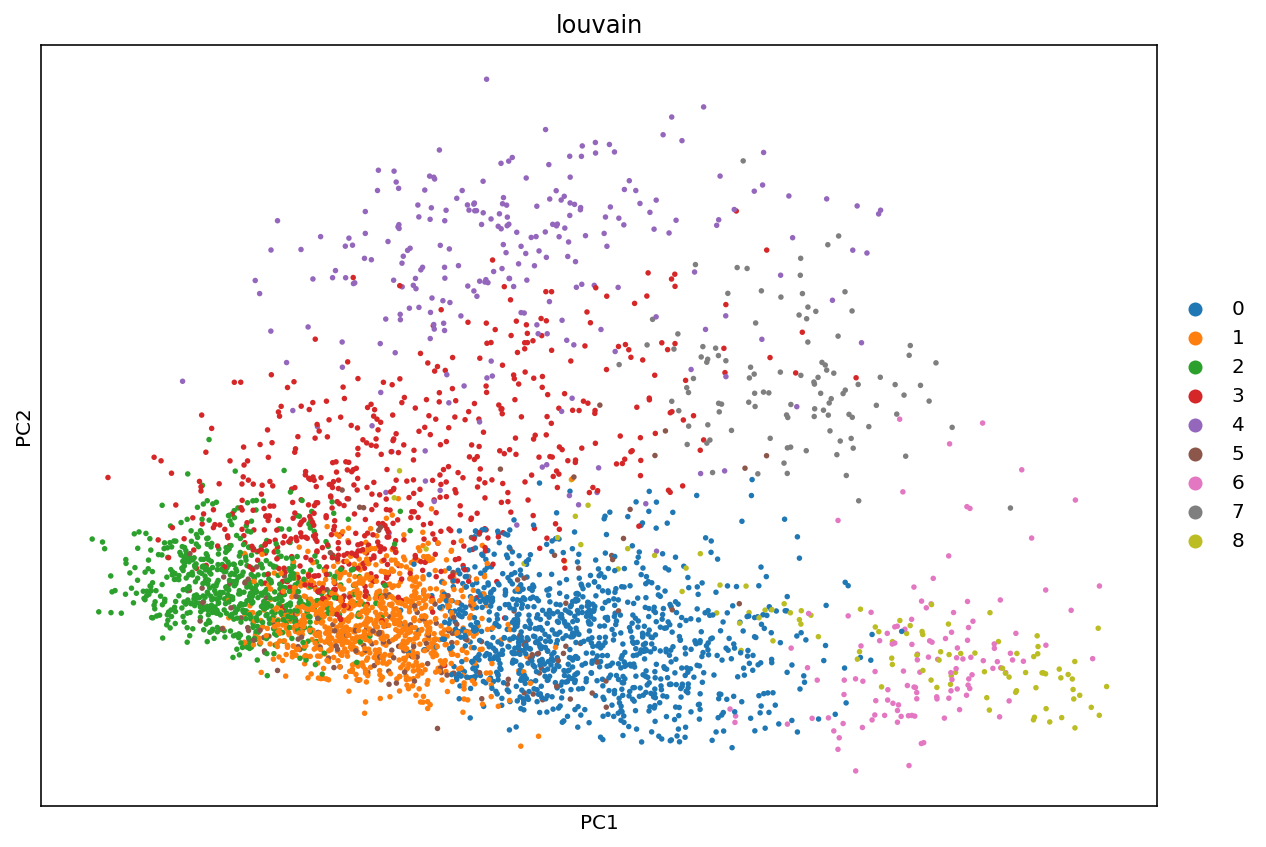

In [62]:
fig, ax = plt.subplots(figsize=(10, 7))
sc.pl.pca(adata, color="louvain", ax=ax)

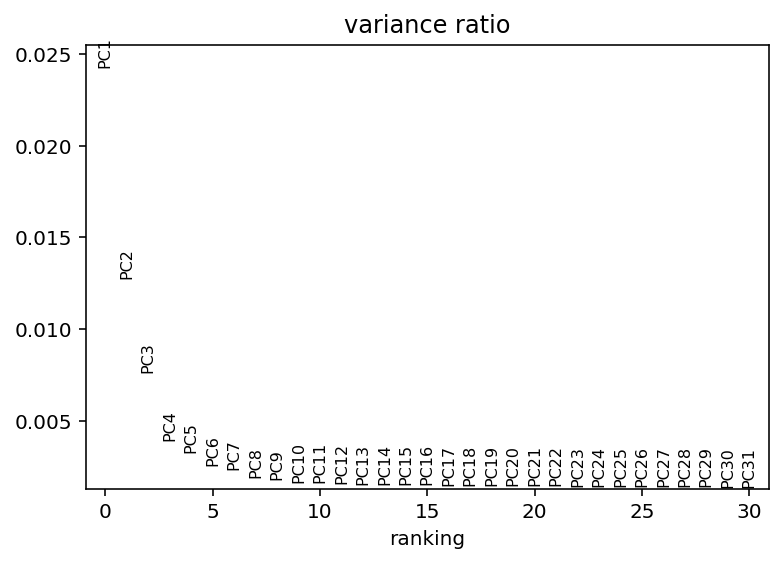

In [63]:
sc.pl.pca_variance_ratio(adata)

saving figure to file ./figures/tsnegetting_started_tsne.png


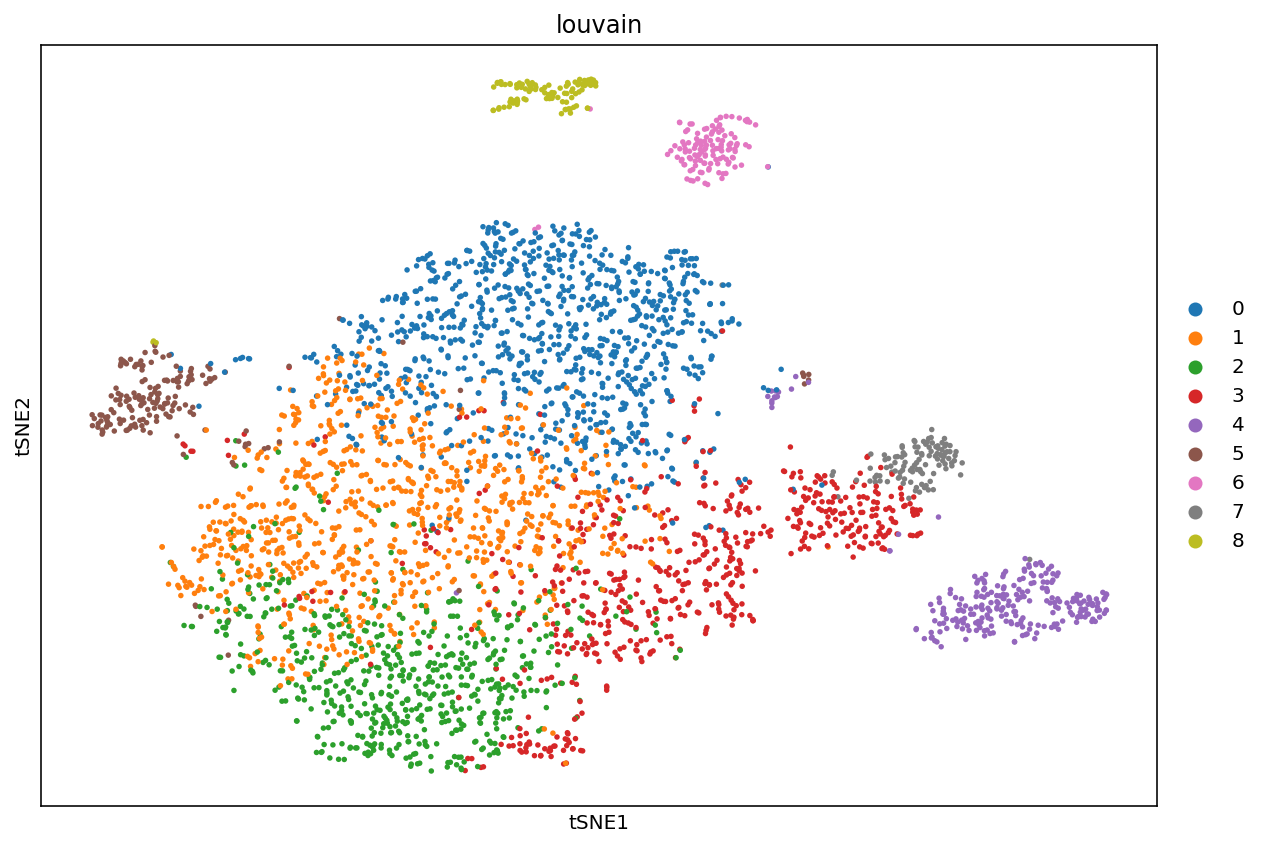

In [67]:
fig, ax = plt.subplots(figsize=(10, 7))
sc.pl.tsne(adata, color="louvain", ax=ax, save="getting_started_tsne.png")